In [3]:
# M
# conda create -n tensorflow python=3.10
# activate tensorflow
# pip install --ignore-installed --upgrade tensorflow

In [ ]:
# https://www.kaggle.com/datasets/brsdincer/wildfire-detection-image-data
# https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset?select=train

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
train =  ImageDataGenerator(rescale=1/255)
test =  ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/Bhavani K/Desktop/M GANESHV12/M PES/M SEM 4/M hashcode/forest_fire/Training and Validation",
                                          target_size = (150,150),
                                         batch_size = 32,
                                         class_mode = 'binary')

test_dataset = test.flow_from_directory("C:/Users/Bhavani K/Desktop/M GANESHV12/M PES/M SEM 4/M hashcode/forest_fire/Testing",
                                       target_size = (150,150),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [4]:
# the model is being built here
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [5]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
# model fit
r = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 27s 406ms/step - loss: 0.2553 - accuracy: 0.9045 - val_loss: 0.3326 - val_accuracy: 0.8824
Epoch 2/10
58/58 [==============================] - 31s 529ms/step - loss: 0.1642 - accuracy: 0.9498 - val_loss: 0.2573 - val_accuracy: 0.9118
Epoch 3/10
58/58 [==============================] - 30s 523ms/step - loss: 0.1595 - accuracy: 0.9541 - val_loss: 0.2204 - val_accuracy: 0.9118
Epoch 4/10
58/58 [==============================] - 28s 489ms/step - loss: 0.1400 - accuracy: 0.9454 - val_loss: 0.4852 - val_accuracy: 0.8382
Epoch 5/10
58/58 [==============================] - 29s 508ms/step - loss: 0.0979 - accuracy: 0.9640 - val_loss: 0.2062 - val_accuracy: 0.9265
Epoch 6/10
58/58 [==============================] - 32s 544ms/step - loss: 0.0821 - accuracy: 0.9705 - val_loss: 0.3648 - val_accuracy: 0.8088
Epoch 7/10
58/58 [==============================] - 42s 726ms/step - loss: 0.0940 - accuracy: 0.9711 - val_loss: 0.2107 - val_accuracy: 0.8971

In [7]:
model.save('forest_fire_detection_model.h5')

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 48ms/step


In [9]:
predictions

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [10]:
print(len(predictions))

68


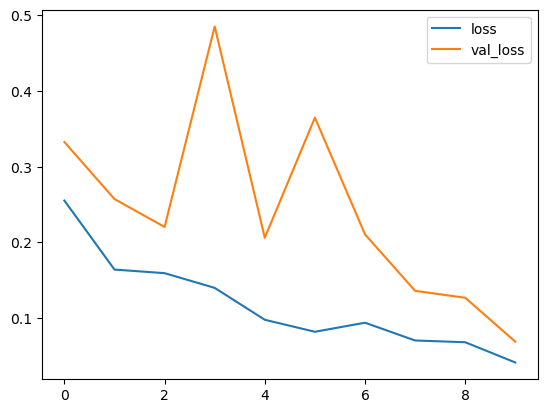

In [11]:
# plotting the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [12]:
# Function to take individual image and check
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    y = image.img_to_array(img1)
    X = np.expand_dims(y, axis = 0)
    val = model.predict(X)
    print(val)
    if val ==1:
        plt.xlabel("NO Fire", fontsize = 30)
    elif val == 0:
        plt.xlabel("Fire", fontsize = 30)

In [1]:
# import cv2
# import numpy as np

# def predictImage(frame):
#     img1 = cv2.resize(frame, (150, 150))
#     y = np.expand_dims(img1, axis = 0)
#     val = model.predict(y)
#     print(val)
#     if val == 1:
#         cv2.putText(frame, "NO Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#     else:
#         cv2.putText(frame, "Fire", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
#     cv2.imshow('frame', frame)

# # model = # Load your CNN model here

# cap = cv2.VideoCapture(0)

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Display the resulting frame
#     predictImage(frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()


1/1 [==============================] - 0s 145ms/step
[[0.]]


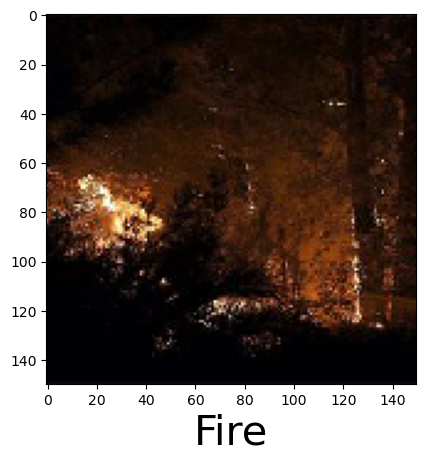

In [13]:
predictImage("C:/Users/Bhavani K/Desktop/M GANESHV12/M PES/M SEM 4/M hashcode/forest_fire/Training and Validation/fire/abc001.jpg")